In [12]:
import pandas as pd
df=pd.read_csv("HTRU_2.csv",header=None)

In [13]:
df.head(10)

0          1         2  ...          6           7  8
0  140.562500  55.683782 -0.234571  ...   7.975532   74.242225  0
1  102.507812  58.882430  0.465318  ...  10.576487  127.393580  0
2  103.015625  39.341649  0.323328  ...   7.735822   63.171909  0
3  136.750000  57.178449 -0.068415  ...   6.896499   53.593661  0
4   88.726562  40.672225  0.600866  ...  14.269573  252.567306  0
5   93.570312  46.698114  0.531905  ...  10.621748  131.394004  0
6  119.484375  48.765059  0.031460  ...  19.206230  479.756567  0
7  130.382812  39.844056 -0.158323  ...  13.539456  198.236457  0
8  107.250000  52.627078  0.452688  ...   9.001004  107.972506  0
9  107.257812  39.496488  0.465882  ...   7.397080   57.784738  0

[10 rows x 9 columns]

In [14]:
X=df.values[:,:-1]
X

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,   0.1593631 , ...,  58.8720002 ,
          2.49951714,   4.59517265],
       [114.5078125 ,  53.90239966,   0.20116138, ...,  13.38173065,
         10.00796731, 134.2389095 ],
       [ 57.0625    ,  85.79734025,   1.40639105, ...,  64.71256228,
         -1.59752658,   1.42947536]])

In [15]:
Y=df.values[:,-1]
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
from sklearn import preprocessing
New_df=preprocessing.scale(X)
X_new=pd.DataFrame(New_df)
X_new

0         1         2  ...         5         6         7
0      1.149317  1.334832 -0.669570  ... -0.370625 -0.072798 -0.287438
1     -0.334168  1.802265 -0.011785  ... -0.588924  0.504427  0.211581
2     -0.314372 -1.053322 -0.145233  ... -0.235328 -0.125996 -0.391373
3      1.000694  1.553254 -0.513409  ... -0.275666 -0.312265 -0.481300
4     -0.871402 -0.858879  0.115609  ... -0.763111  1.324026  1.386794
...         ...       ...       ...  ...       ...       ...       ...
17893  0.988208  1.943284 -0.625655  ... -0.727295  1.586054  1.700034
17894  0.447319  0.429062 -0.328831  ...  0.939926 -1.189159 -0.906574
17895  0.321842  1.956220 -0.299334  ...  1.671568 -1.288079 -0.941330
17896  0.133628  1.074510 -0.260050  ... -0.664857  0.378257  0.275850
17897 -2.105762  5.735470  0.872674  ...  1.971546 -2.197327 -0.971052

[17898 rows x 8 columns]

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
rdata=pca.fit_transform(X_new)
rdata[:10]


array([[-1.27884879, -1.27313333],
       [-1.02055347, -0.20116189],
       [ 0.18828859,  0.43211417],
       [-1.0154657 , -1.46988105],
       [-0.82262618,  2.12365118],
       [-0.45187742,  0.78159081],
       [-2.8827219 ,  2.28534697],
       [-1.4583598 ,  1.00741239],
       [-0.67024275, -0.06025124],
       [ 0.30508499,  0.29889765]])

Text(0, 0.5, 'sum of squared error')

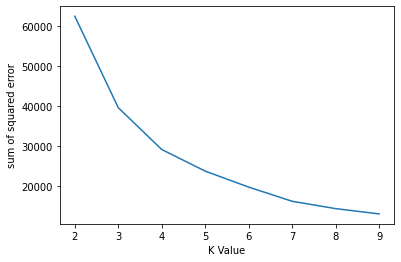

In [18]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans 
lis=[]
r=range(2,10)
for k in r:
  km=KMeans(n_clusters=k)
  km.fit(rdata)
  lis.append(km.inertia_)
plt.plot(r,lis)
plt.xlabel("K Value")
plt.ylabel("sum of squared error")


In [19]:
kmeans=KMeans(n_clusters=3)
y_predict=kmeans.fit(rdata)
#centroids=y_predict.cluster_centers_
centroids=y_predict.cluster_centers_
print(centroids)
print(y_predict)
labels=y_predict.labels_
print(labels)

[[ 1.52237365 -2.24167194]
 [ 6.48663748  2.02718923]
 [-0.71422093  0.24500544]]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[2 2 2 ... 0 2 0]


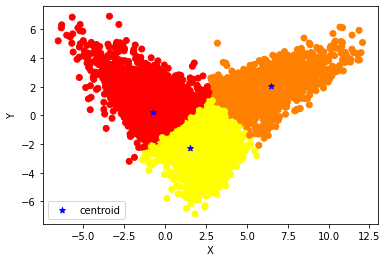

In [20]:
import matplotlib.pyplot as plt
plt.scatter(rdata[:,0],rdata[:,1],c=labels, cmap='autumn_r')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(centroids[:,0],centroids[:,1],marker='*',color='Blue',label='centroid')
plt.legend()

Avg. silhouette score for k=2 is 0.6866540342734797
Avg. silhouette score for k=3 is 0.5232719827002227
Avg. silhouette score for k=4 is 0.3750875686197299
Avg. silhouette score for k=5 is 0.3825327291098247
Avg. silhouette score for k=6 is 0.36393793690222015
Avg. silhouette score for k=7 is 0.3566158438407796
Avg. silhouette score for k=8 is 0.3438917569841291


Text(0, 0.5, 'silhouette score')

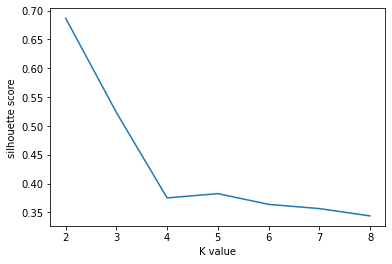

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
scores=[]
cluster_range=range(2,9)
for k in cluster_range:
  km=KMeans(n_clusters=k)
  pred=km.fit_predict(rdata)
  score=silhouette_score(rdata,pred)
  scores.append(score)
  print("Avg. silhouette score for k="+str(k)+" is "+str(score))
plt.plot(cluster_range,scores)
plt.xlabel('K value')
plt.ylabel("silhouette score")

In [22]:
import numpy as np
from sklearn import cluster, datasets, mixture
from itertools import cycle, islice
np.random.seed(0)

no_of_samples=1500

noisy_circles,label1=datasets.make_circles(n_samples=no_of_samples, factor=0.5, noise=.05)
noisy_moons,label2=datasets.make_moons(n_samples=no_of_samples, noise=.05)
blobs,label3=datasets.make_blobs(n_samples=no_of_samples,centers=4,cluster_std=0.60, random_state=0)
no_structure,labels3=np.random.rand(no_of_samples,2), None



 DATASET


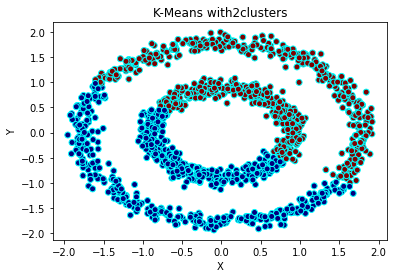

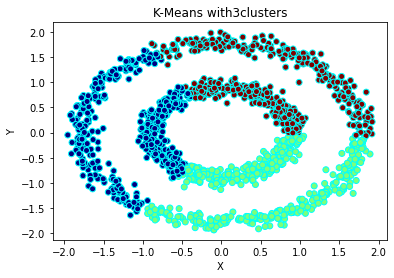

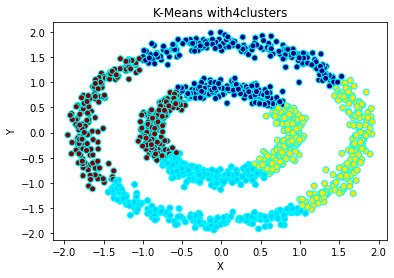



 DATASET


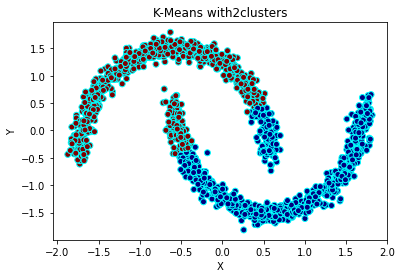

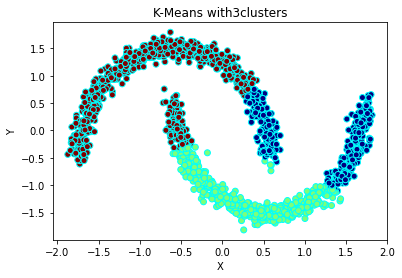

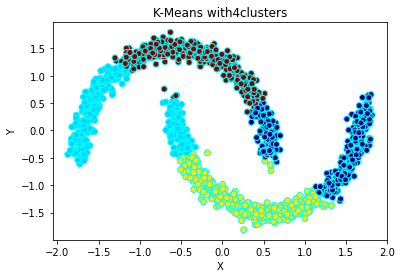



 DATASET


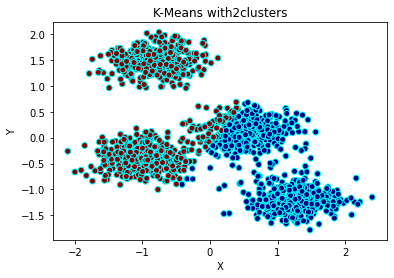

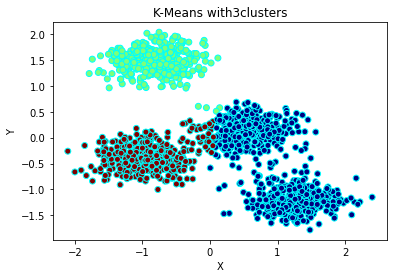

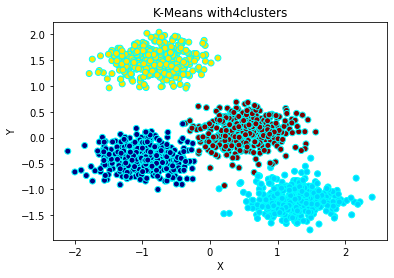



 DATASET


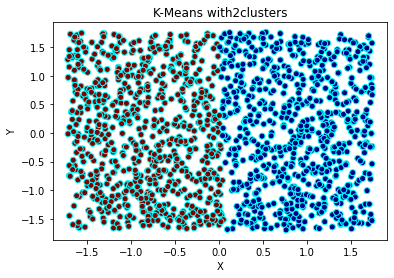

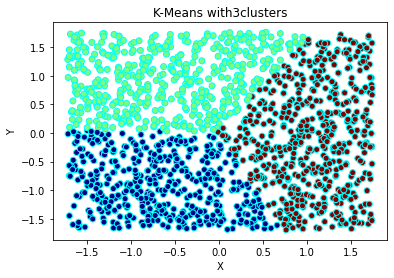

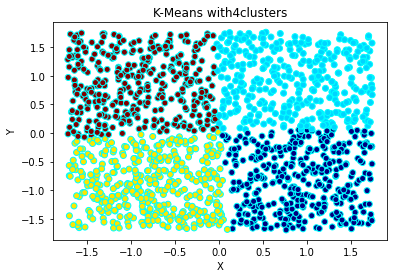

In [23]:
datasets=[noisy_circles,noisy_moons,blobs,no_structure]
for i in datasets:
  X=preprocessing.scale(i)
  print("\n\n DATASET")
  for num in range(2,5):
    kmeans=cluster.KMeans(n_clusters=num)
    clusters=kmeans.fit(X)
    centroids=clusters.cluster_centers_
    new_labels=clusters.labels_
    plt.scatter(X[:,0],X[:,1],c=new_labels, cmap='jet', edgecolors="cyan")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("K-Means with"+str(num)+"clusters")

    plt.show()

# **Agglomerative Clustering:**

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [25]:
Agg=AgglomerativeClustering(n_clusters=3,linkage='single' )
H=Agg.fit(rdata)
new_labels=H.labels_

Text(0, 0.5, 'Y')

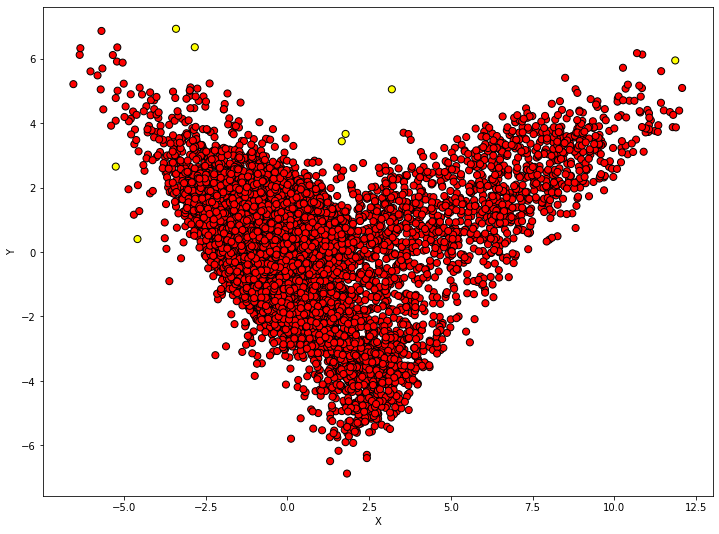

In [34]:
plt.figure(figsize=(12,9))
plt.scatter(rdata[:,0],rdata[:,1], c=new_labels,cmap='autumn_r', edgecolors='K',s=50)
plt.xlabel('X')
plt.ylabel('Y')

In [27]:
from scipy.spatial import distance_matrix
dist=distance_matrix(rdata,rdata)
dist

array([[0.        , 1.102651  , 2.24952465, ..., 2.41680575, 1.16977956,
        6.17219155],
       [1.102651  , 0.        , 1.36467494, ..., 3.01220671, 0.11880638,
        6.67213286],
       [2.24952465, 1.36467494, 0.        , ..., 3.15710065, 1.40384121,
        6.39474942],
       ...,
       [2.41680575, 3.01220671, 3.15710065, ..., 0.        , 3.12922557,
        3.75542434],
       [1.16977956, 0.11880638, 1.40384121, ..., 3.12922557, 0.        ,
        6.79093227],
       [6.17219155, 6.67213286, 6.39474942, ..., 3.75542434, 6.79093227,
        0.        ]])



 DATASET


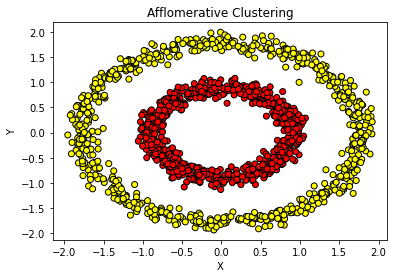

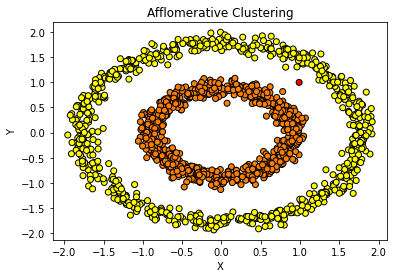

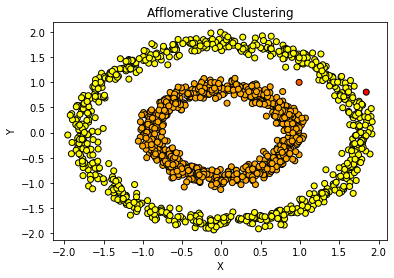



 DATASET


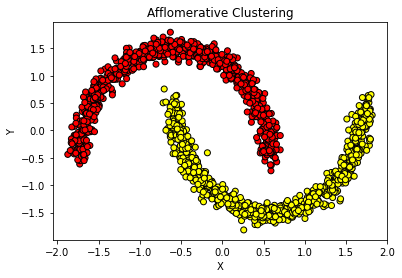

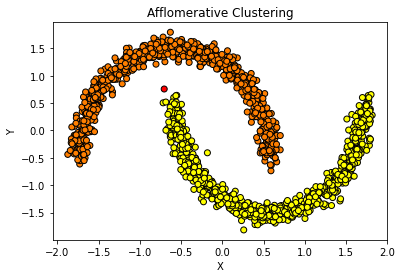

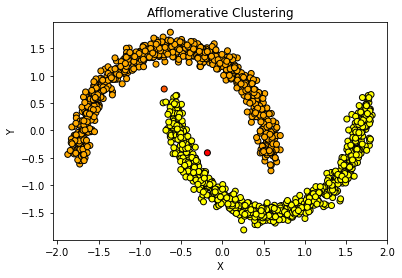



 DATASET


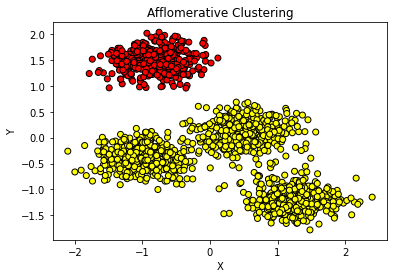

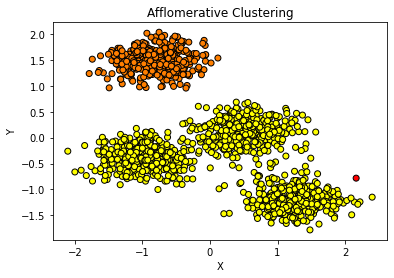

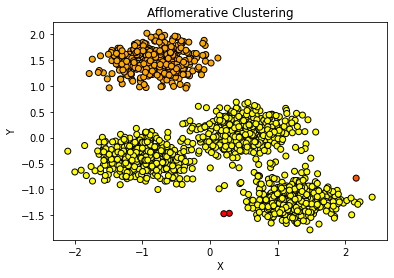



 DATASET


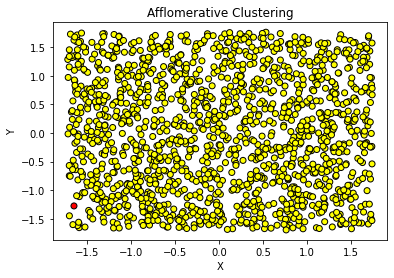

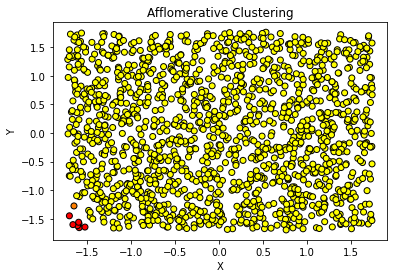

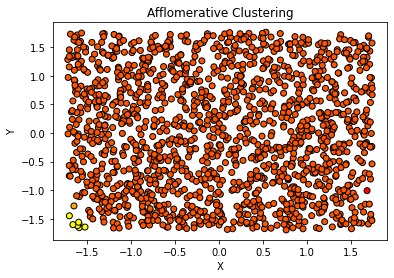

In [39]:
datasets=[noisy_circles,noisy_moons,blobs,no_structure]
for i in datasets:
  X=preprocessing.scale(i)
  print("\n\n DATASET")
  for num in range(2,5):
    Agg=AgglomerativeClustering(n_clusters=num,linkage='single')
    clusters=Agg.fit(X)
    new_labels=clusters.labels_
    plt.scatter(X[:,0],X[:,1],c=new_labels, cmap='autumn_r', edgecolors="black")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Agglomerative Clustering")

    plt.show()

# **Dendrogram:**

In [44]:
import numpy as np
from sklearn import cluster, datasets, mixture
from itertools import cycle, islice
np.random.seed(0)

no_of_samples=35

noisy_circles,label1=datasets.make_circles(n_samples=no_of_samples, factor=0.5, noise=.05)

In [45]:
d=preprocessing.scale(noisy_circles)

In [46]:
from scipy.spatial import distance_matrix
dist=distance_matrix(d,d)
dist

array([[0.        , 1.90198188, 1.97056183, ..., 1.16567332, 2.58249302,
        2.31282151],
       [1.90198188, 0.        , 1.94619706, ..., 1.62834609, 0.68062823,
        1.63032291],
       [1.97056183, 1.94619706, 0.        , ..., 0.80650464, 2.33680825,
        0.68964277],
       ...,
       [1.16567332, 1.62834609, 0.80650464, ..., 0.        , 2.2005218 ,
        1.21676891],
       [2.58249302, 0.68062823, 2.33680825, ..., 2.2005218 , 0.        ,
        1.84531781],
       [2.31282151, 1.63032291, 0.68964277, ..., 1.21676891, 1.84531781,
        0.        ]])

In [47]:
from scipy.cluster import hierarchy
Z=hierarchy.linkage(dist,'average')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


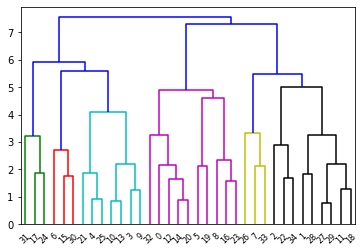

In [48]:
dendro=hierarchy.dendrogram(Z)

# **DBSCAN Clustering:**

In [31]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.8,metric="euclidean")
dbClust=db.fit(rdata)
new_labels=dbClust.labels_

Text(0, 0.5, 'Y')

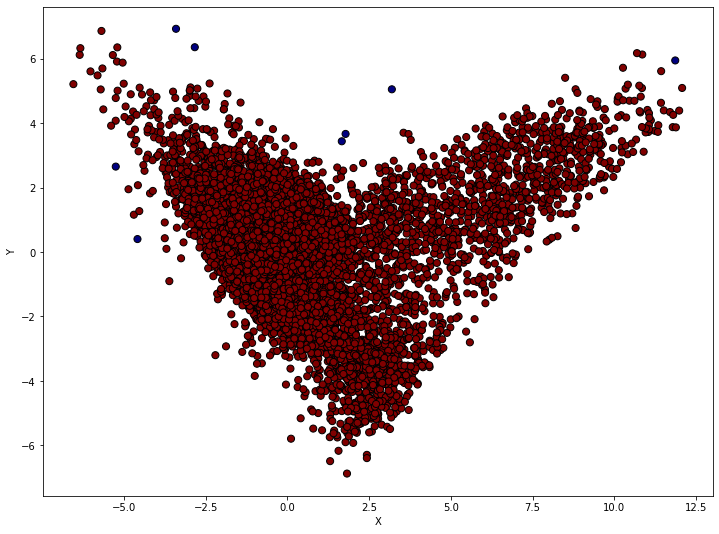

In [33]:
plt.figure(figsize=(12,9))
plt.scatter(rdata[:,0],rdata[:,1], c=new_labels,cmap='jet', edgecolors='K',s=50)
plt.xlabel('X')
plt.ylabel('Y')



 DATASET


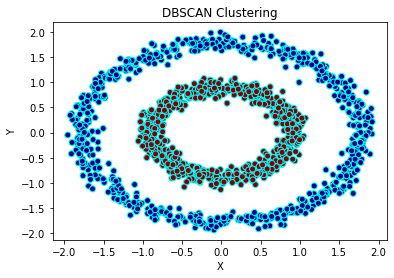

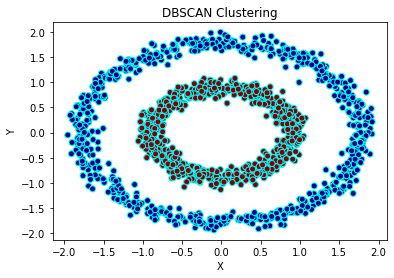

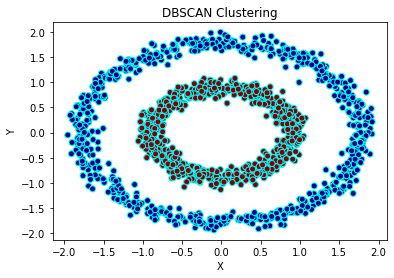



 DATASET


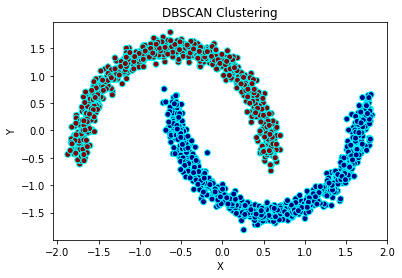

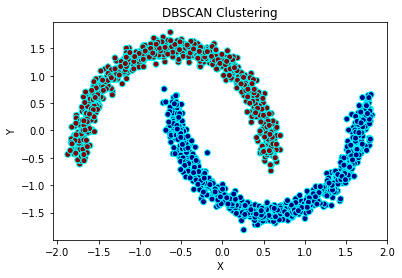

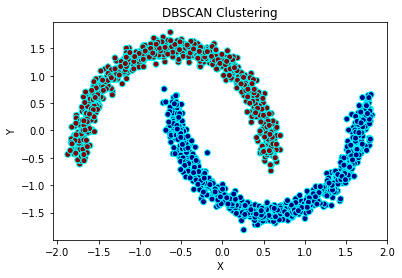



 DATASET


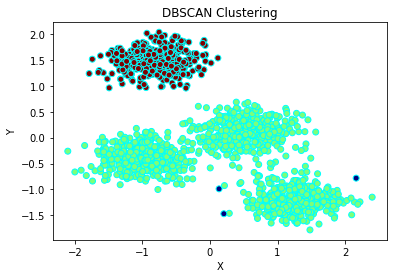

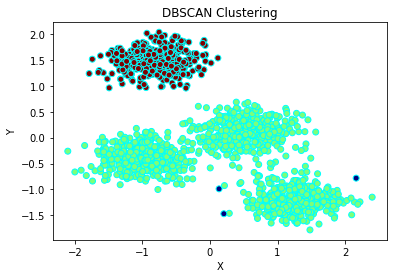

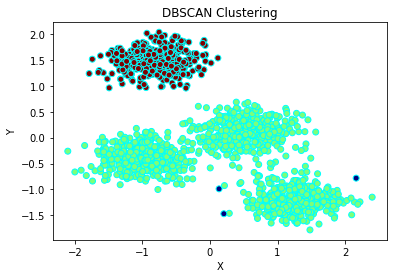



 DATASET


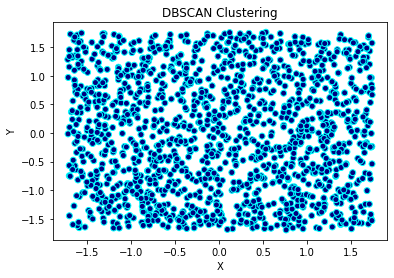

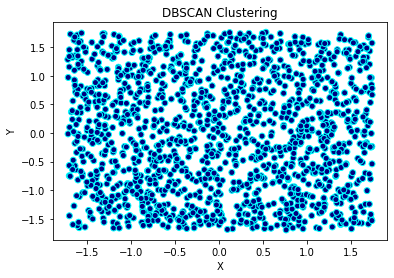

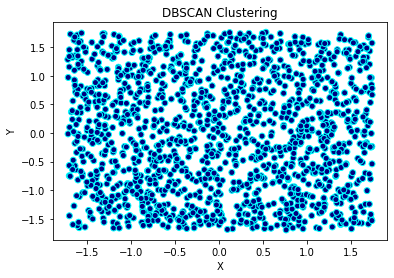

In [37]:
datasets=[noisy_circles,noisy_moons,blobs,no_structure]
for i in datasets:
  X=preprocessing.scale(i)
  print("\n\n DATASET")
  for num in range(2,5):
    db=DBSCAN(eps=0.3)
    clusters=db.fit(X)
    new_labels=clusters.labels_
    plt.scatter(X[:,0],X[:,1],c=new_labels, cmap='jet', edgecolors="cyan")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("DBSCAN Clustering")

    plt.show()